In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("energydata_EDA.csv")

In [3]:
data.head()

,date,Appliances,lights,temp_kitchen,hum_kitchen,temp_living,hum_living,temp_laundry,hum_laundry,temp_office,...,rv1,rv2,month,time,hour,day,seconds,day_of_week,Numerical_Week,weekType
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,13.275433,13.275433,1,17:00:00,17,11,61200,Monday,0,Weekday
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,18.606195,18.606195,1,17:10:00,17,11,61800,Monday,0,Weekday
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,28.642668,28.642668,1,17:20:00,17,11,62400,Monday,0,Weekday
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,45.410389,45.410389,1,17:30:00,17,11,63000,Monday,0,Weekday
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,10.084097,10.084097,1,17:40:00,17,11,63600,Monday,0,Weekday


In [4]:
pandas_profiling.ProfileReport(data)

Number of variables,37
Number of observations,19735
Total Missing (%),0.0%
Total size in memory,5.6 MiB
Average record size in memory,296.0 B
Numeric,29
Categorical,3
Boolean,0
Date,0
Text (Unique),1
Rejected,4


##### Since there is high correlation between rv1 and rv2 data is redundant and similarly seconds & hour, temp_out & temp_building_out, and temp_parentRoom & temp_ironing

In [5]:
#Dropping redundant rows

data = data.drop(['rv2', 'seconds', 'temp_out', 'temp_parentRoom'], axis=1)

In [6]:
data.head()

,date,Appliances,lights,temp_kitchen,hum_kitchen,temp_living,hum_living,temp_laundry,hum_laundry,temp_office,...,Visibility,Tdewpoint,rv1,month,time,hour,day,day_of_week,Numerical_Week,weekType
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,63.000000,5.3,13.275433,1,17:00:00,17,11,Monday,0,Weekday
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,59.166667,5.2,18.606195,1,17:10:00,17,11,Monday,0,Weekday
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,55.333333,5.1,28.642668,1,17:20:00,17,11,Monday,0,Weekday
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,51.500000,5.0,45.410389,1,17:30:00,17,11,Monday,0,Weekday
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,47.666667,4.9,10.084097,1,17:40:00,17,11,Monday,0,Weekday


As we saw in EDA there are many zeros in light, we can drop that coloumn too. But it has also some role in energy consumption and we are analysing energy prediction. So, let's merge appliances and lights coloumns.

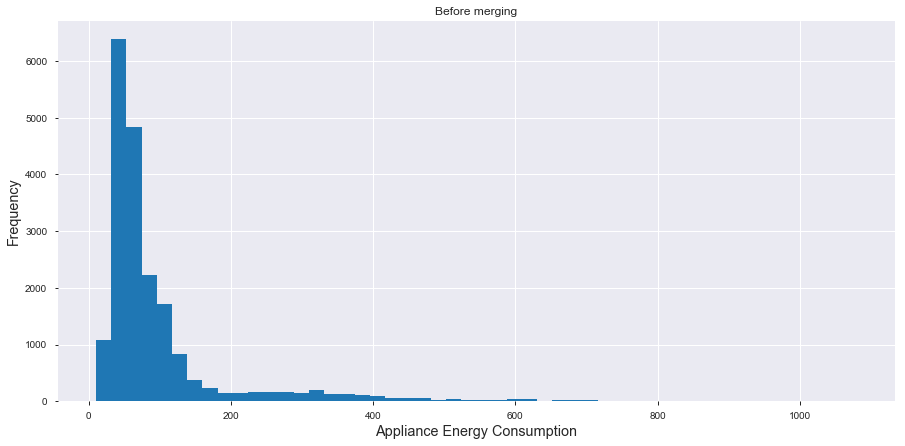

In [7]:
#Before Merging let's check the histogram
%matplotlib inline
plt.title("Before merging")
plt.xlabel("Appliance Energy Consumption", fontsize="x-large")
plt.ylabel("Frequency", fontsize="x-large")
data["Appliances"].hist(figsize=(15,7), bins=50)

In [8]:
data['Appliances'].describe()

count    19735.000000
mean        97.694958
std        102.524891
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Name: Appliances, dtype: float64

In [9]:
# Merging both coloumns and removing lights

data['Appliances'] = data['Appliances'] + data['lights']
data = data.drop(['lights'], axis = 1)

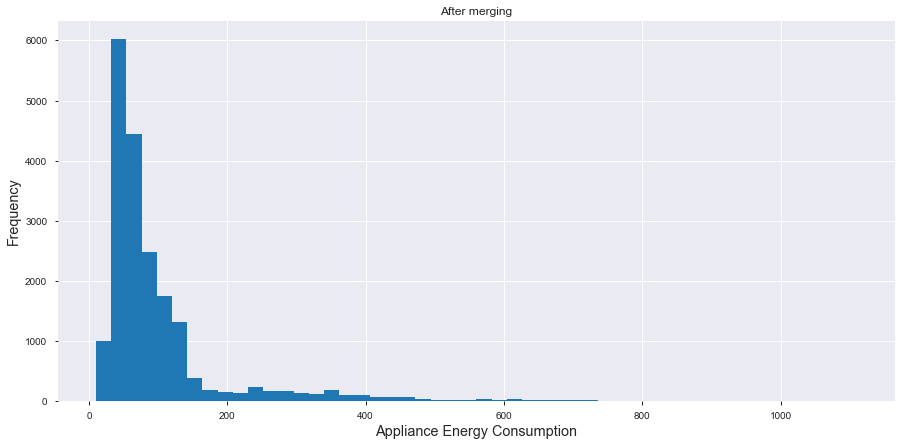

In [10]:
#After Merging let's check the histogram
data['Appliances'].describe()
plt.title("After merging")
plt.xlabel("Appliance Energy Consumption", fontsize="x-large")
plt.ylabel("Frequency", fontsize="x-large")
data["Appliances"].hist(figsize=(15,7), bins=50)

In [11]:
data['Appliances'].describe()

count    19735.000000
mean       101.496833
std        104.380829
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1110.000000
Name: Appliances, dtype: float64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 32 columns):
date                 19735 non-null object
Appliances           19735 non-null int64
temp_kitchen         19735 non-null float64
hum_kitchen          19735 non-null float64
temp_living          19735 non-null float64
hum_living           19735 non-null float64
temp_laundry         19735 non-null float64
hum_laundry          19735 non-null float64
temp_office          19735 non-null float64
hum_office           19735 non-null float64
temp_bathroom        19735 non-null float64
hum_bathroom         19735 non-null float64
temp_building_out    19735 non-null float64
hum_building_out     19735 non-null float64
temp_ironing         19735 non-null float64
hum_ironing          19735 non-null float64
temp_teenRoom        19735 non-null float64
hum_teenRoom         19735 non-null float64
hum_parentRoom       19735 non-null float64
Pressure             19735 non-null float64
hum_out       

Now let's go ahead with prediction algorithms and Exporting the current data frame in csv for further usage

In [13]:
data.to_csv('energydata_Transformation.csv', index=False)